<center>
<img src="../data/logo.png" height="900"> 
</center>


#  Закон больших чисел

В этом блокноте мы просимулируем картинку из презентации для Закона больших чисел и немного обсудим сходимость по вероятности.

---------------

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# 1. ЗБЧ

#### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$


__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$.

In [12]:
n_obs = 1000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x

array([2, 2, 3, 4, 6, 5, 5, 2, 2, 4, 2, 2, 3, 6, 4, 4, 5, 5, 5, 3, 6, 3,
       3, 4, 6, 1, 2, 1, 1, 6, 5, 3, 6, 4, 5, 3, 3, 5, 1, 2, 4, 4, 4, 2,
       4, 5, 6, 6, 3, 6, 2, 2, 5, 4, 6, 1, 2, 2, 2, 1, 2, 1, 1, 5, 3, 4,
       2, 2, 3, 5, 1, 6, 6, 1, 2, 5, 1, 4, 5, 1, 2, 1, 4, 4, 1, 4, 5, 5,
       1, 4, 6, 2, 5, 4, 6, 1, 4, 1, 6, 6, 1, 2, 3, 4, 1, 2, 5, 1, 5, 6,
       5, 6, 5, 1, 5, 6, 6, 2, 3, 1, 5, 4, 1, 5, 1, 4, 2, 5, 6, 1, 5, 4,
       4, 6, 5, 6, 1, 4, 1, 6, 6, 3, 6, 2, 3, 4, 3, 2, 6, 1, 6, 2, 2, 6,
       4, 6, 3, 5, 6, 1, 4, 3, 2, 2, 2, 1, 6, 6, 3, 2, 5, 1, 6, 4, 6, 2,
       4, 3, 2, 2, 6, 3, 6, 4, 4, 6, 1, 1, 5, 3, 2, 6, 6, 2, 4, 2, 6, 3,
       4, 6, 5, 3, 3, 6, 5, 6, 4, 1, 4, 1, 1, 4, 5, 4, 6, 3, 6, 4, 3, 1,
       3, 3, 4, 6, 6, 6, 6, 4, 2, 6, 3, 3, 3, 2, 6, 2, 5, 4, 1, 2, 4, 2,
       1, 5, 1, 6, 1, 5, 3, 6, 1, 1, 5, 6, 6, 6, 4, 2, 5, 4, 5, 3, 1, 4,
       3, 3, 1, 5, 3, 2, 1, 2, 6, 4, 5, 4, 6, 3, 6, 3, 6, 1, 3, 1, 5, 1,
       1, 4, 6, 6, 1, 1, 2, 4, 1, 6, 5, 2, 1, 5, 2,

In [13]:
# считаем кумулятивную сумму
x_cumsum = np.cumsum(x)
x_cumsum[:5]

array([ 2,  4,  7, 11, 17])

In [17]:
np.arange(1, n_obs + 1)[:5]

array([1, 2, 3, 4, 5])

In [18]:
# делим на число наблюдений
x_mean = x_cumsum/np.arange(1, n_obs + 1)
x_mean[:5]

array([2.        , 2.        , 2.33333333, 2.75      , 3.4       ])

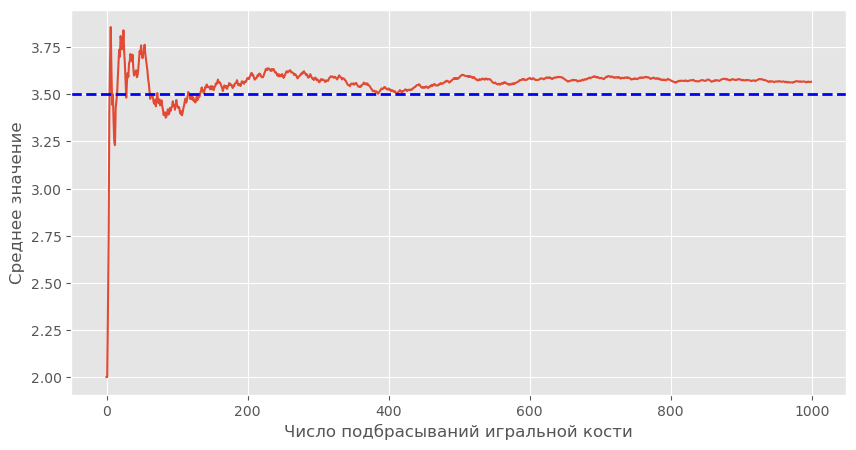

In [19]:
plt.figure(figsize=(10,5))
plt.plot(x_mean)
plt.axhline(3.5, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

# 2. Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

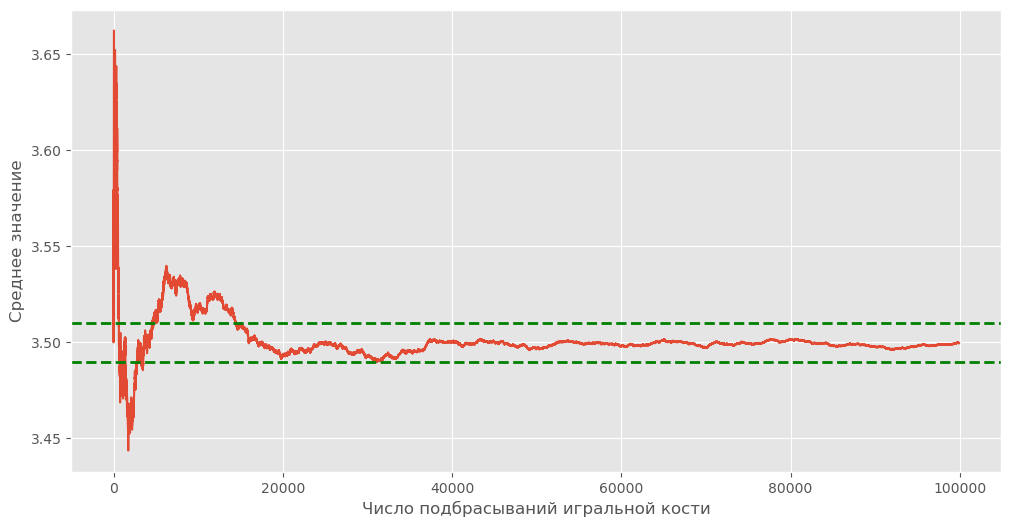

In [21]:
n_obs = 100000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [22]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_cumsum.shape

(10000, 1000)

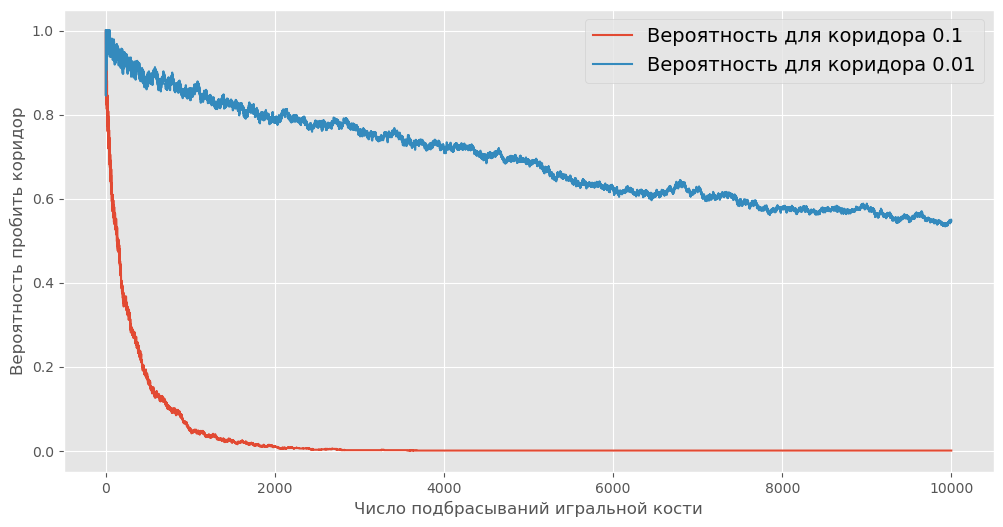

In [23]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. Немного позже мы её вычислим. Окажется, что это 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="../data/animation_prob_conv.gif" width="1800"> 
</center>

## 3. Расходимость  по вероятности


Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [35]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [36]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

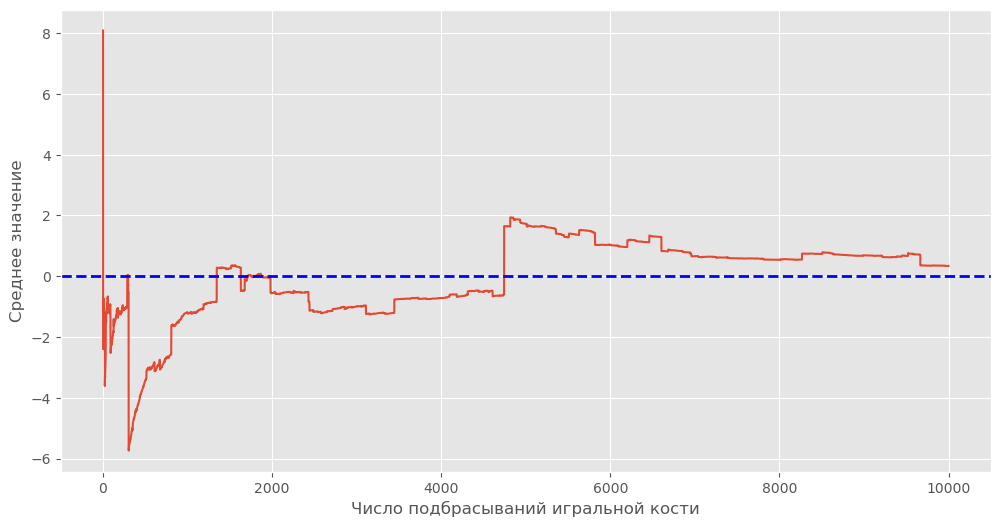

In [37]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

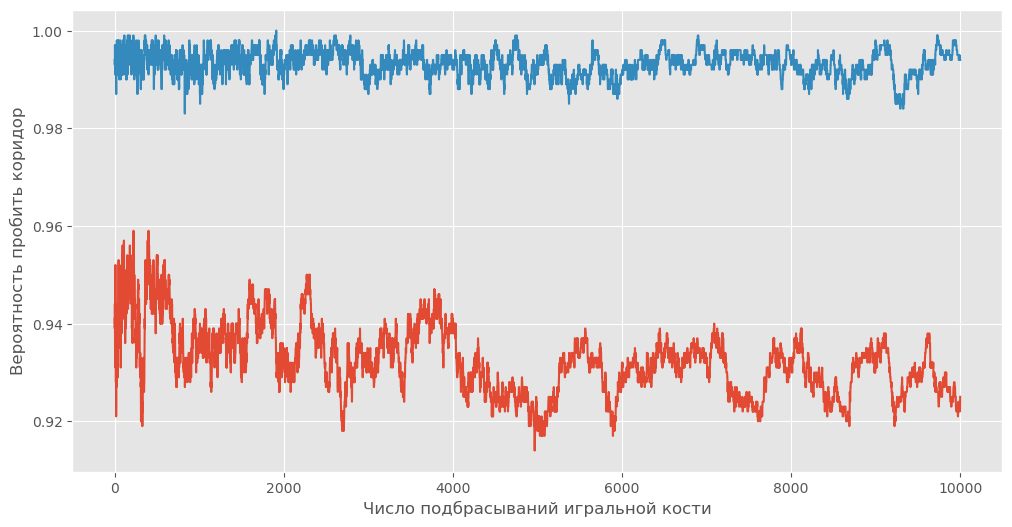

In [38]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="../data/animation_prob_unconv.gif" width="1400"> 
</center>